# Improting Relevant Laibraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

# Loading Data

In [3]:
df=pd.read_csv('HousePricing.csv')

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3,1.50,1340,7912,1.5,0,3,1340,0,1955,2005
1,2384000.0,5,2.50,3650,9050,2.0,4,5,3370,280,1921,0
2,342000.0,3,2.00,1930,11947,1.0,0,4,1930,0,1966,0
3,420000.0,3,2.25,2000,8030,1.0,0,4,1000,1000,1963,0
4,550000.0,4,2.50,1940,10500,1.0,0,4,1140,800,1976,1992


In [5]:
df.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
X = df.drop('price', axis = 1)
y = df['price']

In [7]:
data=df.reset_index()

# Train Teat Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [9]:
y.shape

(4600,)

# Scaling The Inputs

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [11]:
X_test_scaled

array([[ 0.65556839,  0.11045493,  0.99117383, ..., -0.67927447,
        -0.0362029 , -0.83278755],
       [-0.4402218 ,  0.42934156,  0.57777853, ..., -0.67927447,
         1.4118153 ,  1.12756409],
       [-1.53601199, -1.48397821, -1.26660048, ..., -0.67927447,
        -2.02301855,  1.16018565],
       ...,
       [ 0.65556839, -0.20843169,  0.52477914, ..., -0.67927447,
        -0.6086752 ,  1.18872951],
       [-0.4402218 , -0.52731832, -0.85320519, ..., -0.67927447,
         0.90669267,  1.21217625],
       [ 1.75135858,  2.0237747 ,  3.38674658, ...,  3.17350147,
         1.17609141, -0.83278755]])

In [12]:
X_train.shape,X_test.shape

((3450, 11), (1150, 11))

# NN Model

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
input_size=11
output_size=1

model=tf.keras.Sequential([
    
                            
                            tf.keras.layers.Dense(11,activation='softplus'),
    
                            tf.keras.layers.Dense(128,activation='softplus'),
                            tf.keras.layers.Dense(64,activation='softplus'),
                            tf.keras.layers.Dense(64,activation='softplus'),
                            tf.keras.layers.Dense(10,activation='softplus'),
                            tf.keras.layers.Dense(1,activation='softplus')
                    
                        ])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=('mean_absolute_error'))


history=model.fit(X_train_scaled, y_train, epochs=125, validation_split = 0.2,verbose=2)
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/125
87/87 - 1s - loss: 562512.4375 - val_loss: 525973.9375
Epoch 2/125
87/87 - 0s - loss: 513451.0312 - val_loss: 364864.6875
Epoch 3/125
87/87 - 0s - loss: 309842.7500 - val_loss: 215792.9219
Epoch 4/125
87/87 - 0s - loss: 211376.5156 - val_loss: 178256.4844
Epoch 5/125
87/87 - 0s - loss: 189935.9375 - val_loss: 172862.5000
Epoch 6/125
87/87 - 0s - loss: 184560.3750 - val_loss: 170849.5000
Epoch 7/125
87/87 - 0s - loss: 182347.7969 - val_loss: 166838.8281
Epoch 8/125
87/87 - 0s - loss: 179916.6562 - val_loss: 165596.7031
Epoch 9/125
87/87 - 0s - loss: 178487.7969 - val_loss: 162683.0000
Epoch 10/125
87/87 - 0s - loss: 176995.0938 - val_loss: 161766.5156
Epoch 11/125
87/87 - 0s - loss: 176061.6875 - val_loss: 161260.1094
Epoch 12/125
87/87 - 0s - loss: 175269.6094 - val_loss: 159445.9531
Epoch 13/125
87/87 - 0s - loss: 174679.5781 - val_loss: 158342.9219
Epoch 14/125
87/87 - 0s - loss: 174185.0312 - val_loss: 158367.8594
Epoch 15/125
87/87 - 0s - loss: 173181.1406 - val_loss: 1

Epoch 122/125
87/87 - 0s - loss: 167449.6094 - val_loss: 152860.5312
Epoch 123/125
87/87 - 0s - loss: 167487.4844 - val_loss: 152535.0469
Epoch 124/125
87/87 - 0s - loss: 167465.4688 - val_loss: 152925.0781
Epoch 125/125
87/87 - 0s - loss: 167340.8594 - val_loss: 152720.0156


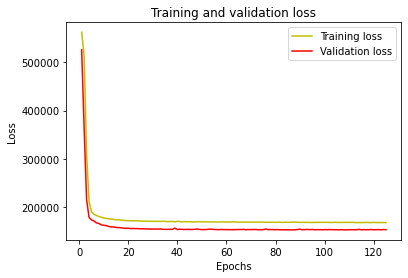

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

this graph shous us that we are not overfitting since validation loss is always less than the training loss

# Prediction on test DataSet

In [16]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[785540.3 ]
 [572171.3 ]
 [421024.3 ]
 [646984.8 ]
 [275223.28]]
Real values are:  2899    600000.0
61      459990.0
1627    399000.0
202     562000.0
2374    405000.0
Name: price, dtype: float64


In [17]:
mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean absolute error from neural net: ', mae_neural)

36/36 [==============================] - 0s 914us/step - loss: 155858.4844
Mean absolute error from neural net:  155858.484375


# Linear regression

In [18]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean absolute error from linear regression:  162463.5442164709


# Decision tree

In [20]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean absolute error using decision tree: ', mae_dt)

Mean absolute error using decision tree:  225975.8001562609


# Random forest.
#Increasing the number of tress and seeing the effect

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=30, random_state=30)

In [22]:
y_pred_RF = model.predict(X_test_scaled)

In [23]:
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Mean absolute error Using Random Forest:  171133.57828058646


### Features by Importance

In [24]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

sqft_living      0.361767
sqft_lot         0.182554
yr_built         0.145491
bathrooms        0.079503
sqft_above       0.075857
condition        0.043626
bedrooms         0.029093
yr_renovated     0.024353
sqft_basement    0.021691
floors           0.018902
view             0.017163
dtype: float64
